### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.


Aim of the case study: Identfy the borrowers who are likely to default , factors behind loan default 

In [483]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from scipy import stats 
import matplotlib.pyplot as plt
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})   
import warnings
# Ignoring warnings 
warnings.filterwarnings('ignore')

In [484]:
# Read the csv file with data into data frame
loan_df = pd.read_csv('loan.csv')

#Read the csv file with metadata or data dictionary 
data_dictionary_df = pd.read_excel("Data_Dictionary.xlsx", engine='openpyxl')

In [485]:
# View top Rows and Columns
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [486]:
loan_df.shape

(39717, 111)

In [487]:
loan_df.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   

In [488]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [489]:
data_dictionary_df

,LoanStatNew,Description,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,acc_now_delinq,The number of accounts on which the borrower i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,acc_open_past_24mths,Number of trades opened in past 24 months.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,addr_state,The state provided by the borrower in the loan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,all_util,Balance to credit limit on all trades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,annual_inc,The self-reported annual income provided by th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,zip_code,The first 3 numbers of the zip code provided b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Understanding

Looking at the loan data it has 111 total columns all the columns would not be required for analysis , 
need to remove columns which do not have necessary data both from business and analysis perspective


### Data Cleaning

* Identify column with all null values
* Align Missed columns if required
* Merge columns if required
* split and rename columns

In [490]:
# Find column with Null values
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [491]:
# Drop Columns with all Null Values      
loan_df = loan_df.dropna(axis=1,how='all')

In [492]:
loan_df.shape

(39717, 57)

In [493]:
# Drop Rows with all Null Values

loan_df = loan_df.dropna(axis=0,how='all')

In [494]:
loan_df.shape

(39717, 57)

Observation: All Rows have some data No rows with all Null Values



In [495]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [496]:
loan_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Drop column which are irrelevant
* Irrlevant for data analysis based on business domain
* column with all same values example zero

In [497]:
non_relevant_columns = ["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" ,"mths_since_last_delinq", "mths_since_last_record",'tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','initial_list_status','application_type','policy_code','collections_12_mths_ex_med','pymnt_plan']



In [498]:
# Drop columns with all zero or Null Values
#loan_df.drop(labels=['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','initial_list_status'],axis =1,inplace=True)

In [499]:
# Drop Column same value across or values as 0 , NA
#loan_df.drop(labels=['application_type','policy_code','collections_12_mths_ex_med','pymnt_plan'],axis =1,inplace=True)

In [500]:
loan_df.drop(non_relevant_columns, axis = 1, inplace = True)




In [501]:
loan_df.shape

(39717, 23)

In [502]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [503]:
loan_df.isnull().sum()

loan_amnt                  0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

## Fix Column with Null values 





emp_length
revol_util
pub_rec_bankruptcies

In [504]:
# For Emp length fetching the number of years and changing the data type to int
loan_df.emp_length.head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [505]:
loan_df.emp_length = loan_df.emp_length.str.extract('(\d+)')
loan_df.emp_length.isnull().sum()
loan_df.emp_length.fillna('0',inplace=True)
loan_df.emp_length.dtype


dtype('O')

In [506]:
loan_df.emp_length = loan_df.emp_length.astype('str').astype('int')
loan_df.emp_length.dtype
loan_df.emp_length.head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: int64

In [507]:
loan_df.emp_length.value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: emp_length, dtype: int64

In [508]:
# Analysing revol_util

In [509]:
loan_df.revol_util.isna().sum()

50

In [510]:
#Dropping null valyes from the revol_util column
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)


In [511]:
# Analysing pub_rec_bankruptcies
loan_df.pub_rec_bankruptcies.isnull().sum()

697

In [512]:
# removing rows having null in 'pub_rec_bankruptcies'
loan_df.pub_rec_bankruptcies.fillna(loan_df.pub_rec_bankruptcies.mode()[0], inplace = True)
loan_df.pub_rec_bankruptcies.value_counts()

0.0    37987
1.0     1673
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [513]:
#  Check  Missing Values 
loan_df.isnull().sum()

loan_amnt               0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

Data Cleaning null values: All the null values in columns is resolved

In [514]:
loan_df.shape

(39667, 23)

### Standardize Values

In [515]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39667 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39667 non-null  int64  
 1   funded_amnt_inv       39667 non-null  float64
 2   term                  39667 non-null  object 
 3   int_rate              39667 non-null  object 
 4   installment           39667 non-null  float64
 5   grade                 39667 non-null  object 
 6   sub_grade             39667 non-null  object 
 7   emp_length            39667 non-null  int64  
 8   home_ownership        39667 non-null  object 
 9   annual_inc            39667 non-null  float64
 10  verification_status   39667 non-null  object 
 11  issue_d               39667 non-null  object 
 12  loan_status           39667 non-null  object 
 13  purpose               39667 non-null  object 
 14  addr_state            39667 non-null  object 
 15  dti                

In [516]:
#  term column removing unwanted Strings from column
loan_df.term = loan_df.term.str.extract('(\d+)')
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36,10.65%,162.87,B,B2,10,RENT,24000.0,...,credit_card,AZ,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60,15.27%,59.83,C,C4,1,RENT,30000.0,...,car,GA,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36,15.96%,84.33,C,C5,10,RENT,12252.0,...,small_business,IL,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000.0,36,13.49%,339.31,C,C1,10,RENT,49200.0,...,other,CA,20.00,Feb-96,1,10,0,21%,37,0.0
4,3000,3000.0,60,12.69%,67.79,B,B5,1,RENT,80000.0,...,other,OR,17.94,Jan-96,0,15,0,53.90%,38,0.0


In [517]:
#  Interest rate column removing %
loan_df.int_rate = loan_df.int_rate.str.extract('(\d+)').astype('str').astype('int')
loan_df.int_rate.dtype

dtype('int64')

In [518]:
loan_df.revol_util.head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [519]:
loan_df.revol_util = loan_df.revol_util.str.extract('(\d+)').astype('str').astype('int')
loan_df.revol_util.head()

0    83
1     9
2    98
3    21
4    53
Name: revol_util, dtype: int64

In [520]:
### Standardize loan issue date column
loan_df.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [521]:
loan_df_year = loan_df.issue_d.str.extract('(\d+)')
loan_df_month = loan_df.issue_d.str.extract('(\D+)-')
loan_df['issue_month'] = loan_df.issue_d.str.extract('(\D+)-')
loan_df['issue_year'] = '20'+loan_df.issue_d.str.extract('(\d+)')

#### Removing Outliers

In [522]:
## Checking Outliers in loan amount

<AxesSubplot:xlabel='loan_amnt'>

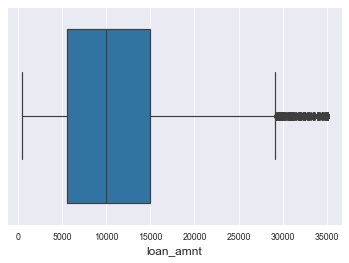

In [523]:
sns.boxplot(loan_df.loan_amnt)

In [524]:
quantile_info = loan_df.loan_amnt.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50    10000.0
0.75    15000.0
0.90    22000.0
0.95    25000.0
0.97    30000.0
0.98    31500.0
0.99    35000.0
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

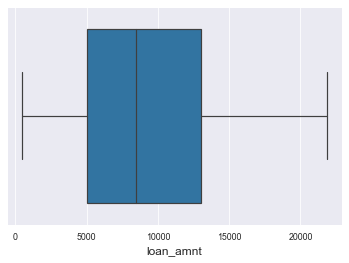

In [525]:
 sns.boxplot((loan_df[loan_df.loan_amnt < loan_df['loan_amnt'].quantile(0.90)]).loan_amnt)

In [526]:
 loan_df = (loan_df[loan_df.loan_amnt < loan_df['loan_amnt'].quantile(0.90)])

In [527]:
## Checking Outliers in Annual income

<AxesSubplot:xlabel='annual_inc'>

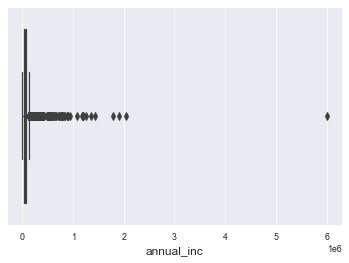

In [528]:
sns.boxplot(loan_df.annual_inc)


<AxesSubplot:xlabel='annual_inc'>

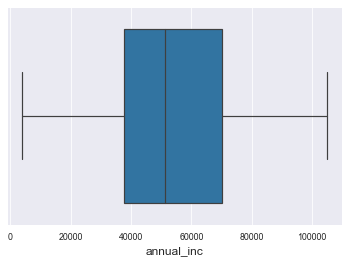

In [529]:
loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
loan_df.annual_inc.mode()
loan_df.annual_inc.mean()
sns.boxplot((loan_df[loan_df.annual_inc < loan_df['annual_inc'].quantile(0.90)]).annual_inc)


In [530]:
loan_df = loan_df[loan_df.annual_inc < loan_df['annual_inc'].quantile(0.90)]

In [531]:
## Checking Outliers in Funded Amount

<AxesSubplot:xlabel='funded_amnt_inv'>

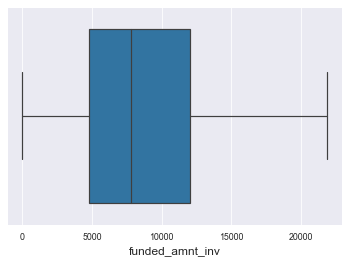

In [532]:

sns.boxplot(loan_df.funded_amnt_inv)


In [533]:
loan_df.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])



0.500     7800.000000
0.750    11995.736210
0.900    15750.000000
0.950    18175.000000
0.970    19764.076623
0.975    19939.890677
0.980    19975.000000
0.985    20000.000000
0.990    20000.000000
1.000    21850.000000
Name: funded_amnt_inv, dtype: float64

<AxesSubplot:xlabel='funded_amnt_inv'>

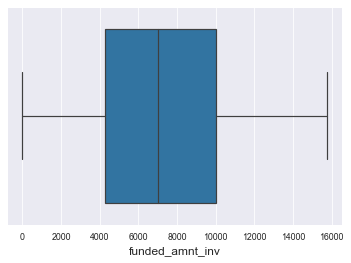

In [534]:
sns.boxplot((loan_df[loan_df.funded_amnt_inv < loan_df.funded_amnt_inv.quantile(0.90)]).funded_amnt_inv)

In [535]:
loan_df = loan_df[loan_df.funded_amnt_inv < loan_df['funded_amnt_inv'].quantile(0.90)]

In [536]:
# Taking into account with loan status as Fully Charged or Charged Off

In [537]:
loan_df.drop(loan_df[loan_df.loan_status == 'Current'].index, inplace = True)


### Lets Check correlation between different features in the data

<AxesSubplot:>

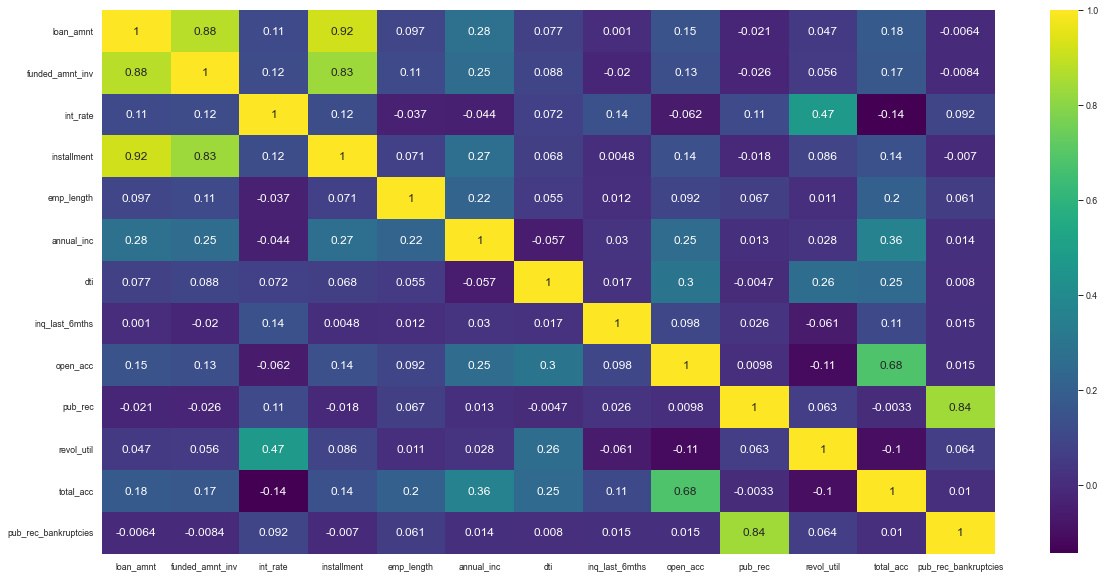

In [538]:
plt.figure(figsize=(20, 10))
sns.heatmap(loan_df.corr(), annot=True, cmap='viridis')


## Univariate Analysis


### Analysing individual features

In [539]:
# #CountPlot for Charged off loan
# def count_plot_charged_off( y_column,hue, graphTitle, x_axis, y_axis,size_x = 12, size_y =8):
#     plt.figure(figsize = (size_x,size_y))
#     x = sns.countplot(y = y_column,data = loan_df, hue = hue,orient='horizontal')
#     x.set_title(graphTitle)
#     x.set_ylabel(y_axis)
#     x.set_xlabel(x_axis)
    
#     df = loan_df.groupby([y_column])['loan_status'].value_counts(normalize=True).rename('Charged off %').reset_index().sort_values(y_column)
#     print(df.loc[df['loan_status']=='Charged Off'].sort_values(by = 'Charged off %', ascending=False))
#     plt.show()

#### Pub rec
Number of Public derogatory records

In [540]:
loan_df.pub_rec.value_counts(normalize=True).reset_index()

,index,pub_rec
0,0,0.940111
1,1,0.058145
2,2,0.001495
3,3,0.000178
4,4,0.000071


We can neglect the public rec value since most of the people do not have any public derogatoryu record

##### pub_rec_bankruptcies
Number of public record bankruptcies

In [541]:
loan_df.pub_rec_bankruptcies.value_counts(normalize=True).reset_index()

,index,pub_rec_bankruptcies
0,0.0,0.952886
1,1.0,0.046936
2,2.0,0.000178


We can neglect the public rec value since most of the people do not have any public record bankruptcies

In [542]:
# Creating reusable function for count plot using seaborn
def basic_sns_count_plot(title_x,data_df, size_x = 6, size_y = 6):
    fig, ax = plt.subplots(figsize = (size_x,size_y))
    sns.countplot(title_x, data=data_df)
    ax.set_xlabel(title_x, fontsize = 14)
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

#Reusable method for CountPlot for Charged off loan
def count_plot_charged_off( y_column,hue, graphTitle, x_axis, y_axis,size_x = 12, size_y =8):
    plt.figure(figsize = (size_x,size_y))
    ax = sns.countplot(y = y_column,data = loan_df, hue = hue)
    ax.set_title(graphTitle)
    ax.set_ylabel(y_axis)
    ax.set_xlabel(x_axis)
    
    df = loan_df.groupby([y_column])['loan_status'].value_counts(normalize=True).mul(100).rename('Charged off %').reset_index().sort_values(y_column)
    print(df.loc[df['loan_status']=='Charged Off'].sort_values(by = 'Charged off %', ascending=False))
    plt.show()

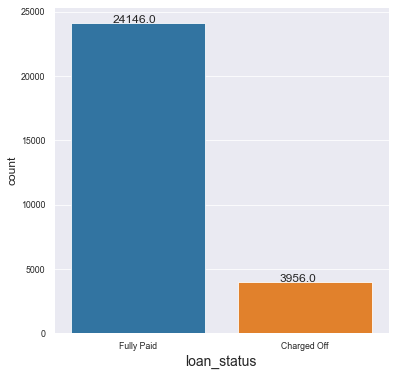

In [543]:
#Unordered Categorical Variables - Loan Status
basic_sns_count_plot('loan_status', loan_df,6,6)

In [544]:
loan_df.loan_status.value_counts(normalize=True) * 100

Fully Paid     85.92271
Charged Off    14.07729
Name: loan_status, dtype: float64

Observation: About 14% of loans are charged off

***home_ownership column Analysis***
##### Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan


  home_ownership  loan_status  Charged off %
4          OTHER  Charged Off      19.480519
8           RENT  Charged Off      14.785395
6            OWN  Charged Off      14.377682
1       MORTGAGE  Charged Off      12.985437


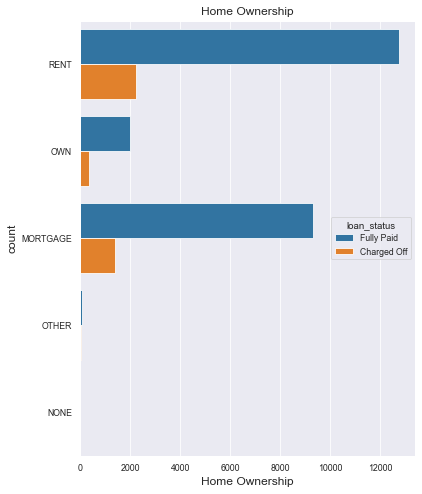

In [545]:

# basic_sns_count_plot('home_ownership',loan_df[loan_df['loan_status']=='Charged Off'])
count_plot_charged_off( 'home_ownership','loan_status', 'Home Ownership', 'Home Ownership', 'count',size_x = 6, size_y =8)

** Observation : Above plot tells us that people with Rent are appying for more loan_dfs

#### Analysing column Purpose
* Unordered Categorical Variables - Purpose

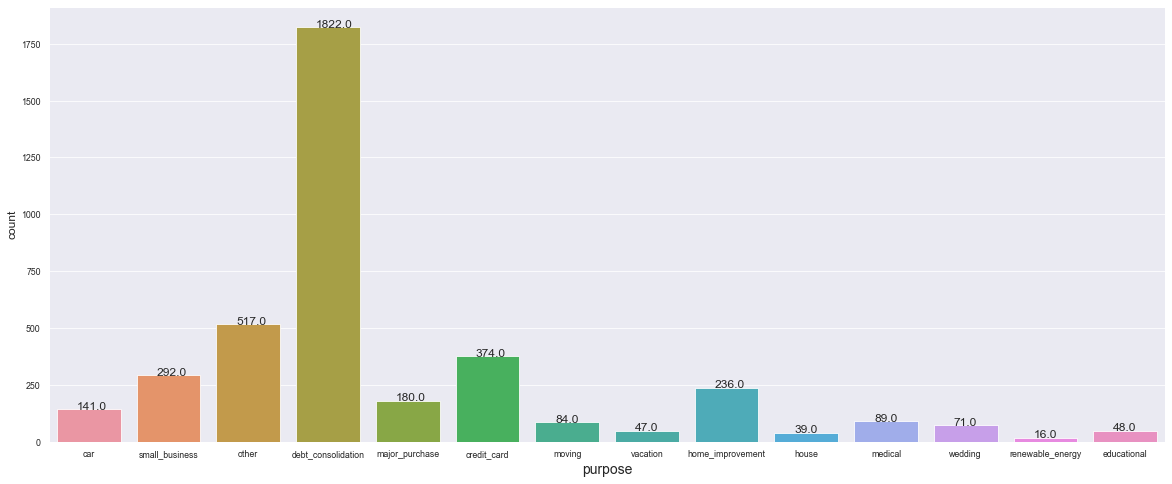

In [546]:
basic_sns_count_plot('purpose',loan_df[loan_df.loan_status == 'Charged Off'],20,8)
# fig, ax = plt.subplots(figsize = (20,8))
# sns.countplot(x ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])

               purpose  loan_status  Charged off %
23      small_business  Charged Off      25.932504
21    renewable_energy  Charged Off      20.512821
17              moving  Charged Off      17.391304
7          educational  Charged Off      17.021277
15             medical  Charged Off      16.330275
19               other  Charged Off      16.136080
11               house  Charged Off      15.725806
5   debt_consolidation  Charged Off      14.501751
25            vacation  Charged Off      14.114114
9     home_improvement  Charged Off      12.640600
1                  car  Charged Off      10.746951
3          credit_card  Charged Off      10.417827
13      major_purchase  Charged Off      10.303377
27             wedding  Charged Off       9.820194


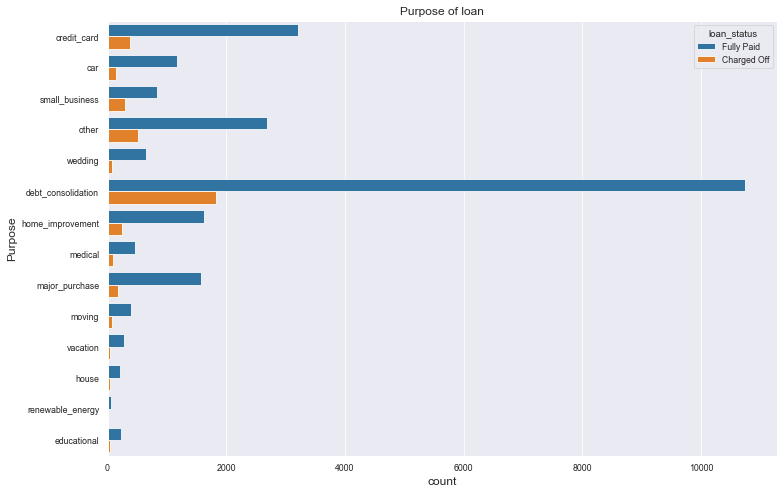

In [547]:
count_plot_charged_off('purpose','loan_status','Purpose of loan','count','Purpose',12,8)

Observations:
 More number of people took loan_df for **debt consolidation**

#### Analysing loan_df issues by year , month

In [548]:
loan_df.issue_d.value_counts().head()

Nov-11    1413
Dec-11    1318
Oct-11    1280
Sep-11    1277
Jul-11    1259
Name: issue_d, dtype: int64

In [549]:
loan_df_year = loan_df.issue_d.str.extract('(\d+)')
loan_df_month = loan_df.issue_d.str.extract('(\D+)-')

In [550]:
loan_df['issue_month'] = loan_df.issue_d.str.extract('(\D+)-')

In [551]:
loan_df['issue_year'] = '20'+loan_df.issue_d.str.extract('(\d+)')

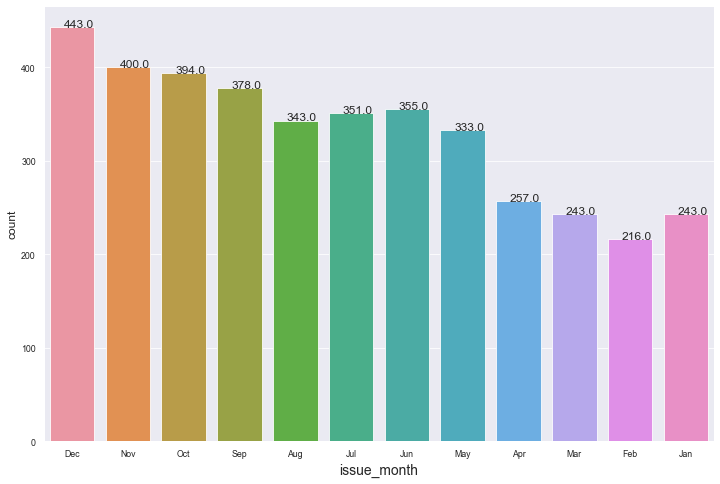

In [552]:
basic_sns_count_plot('issue_month',loan_df[loan_df['loan_status']=='Charged Off'],12,8)
# sns.countplot(x='issue_month', data=loan_df[loan_df['loan_status']=='Charged Off'])

   issue_month  loan_status  Charged off %
23         Sep  Charged Off      15.434871
17         May  Charged Off      15.345622
5          Dec  Charged Off      15.145299
21         Oct  Charged Off      14.998097
13         Jun  Charged Off      14.834935
3          Aug  Charged Off      13.965798
19         Nov  Charged Off      13.836043
11         Jul  Charged Off      13.802595
9          Jan  Charged Off      13.598209
15         Mar  Charged Off      12.322515
1          Apr  Charged Off      12.214829
7          Feb  Charged Off      12.100840


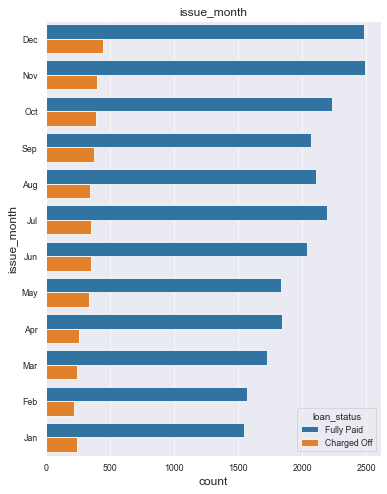

In [553]:
count_plot_charged_off('issue_month','loan_status','issue_month','count','issue_month',6,8)

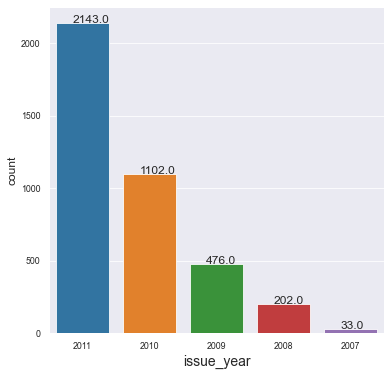

In [554]:
basic_sns_count_plot('issue_year',loan_df[loan_df['loan_status']=='Charged Off'])

Observation: Most of the loan_dfs were issues in year 2011

  home_ownership  loan_status  Charged off %
4          OTHER  Charged Off      19.480519
8           RENT  Charged Off      14.785395
6            OWN  Charged Off      14.377682
1       MORTGAGE  Charged Off      12.985437


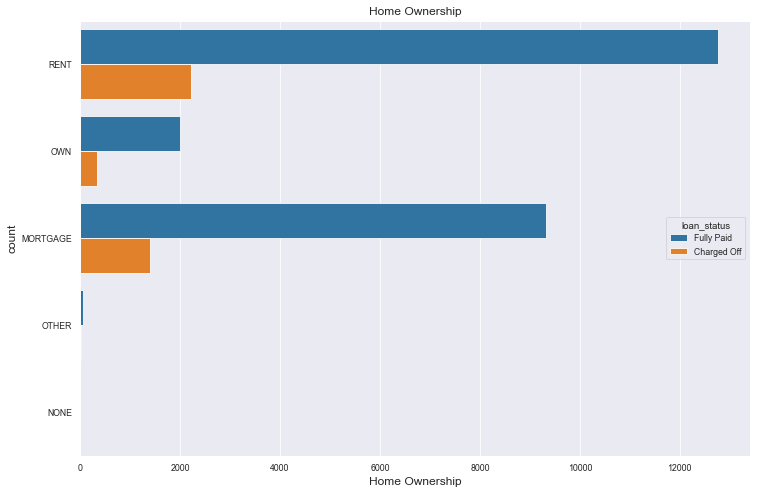

In [555]:
count_plot_charged_off('home_ownership','loan_status','Home Ownership','Home Ownership','count')

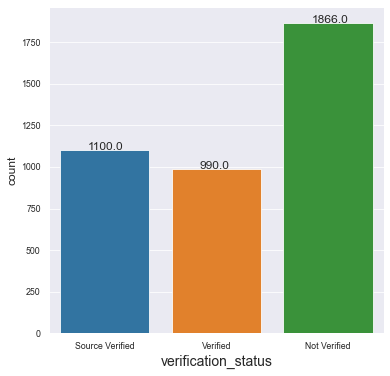

In [556]:
basic_sns_count_plot('verification_status',loan_df[loan_df['loan_status']=='Charged Off'])

  verification_status  loan_status  Charged off %
5            Verified  Charged Off      16.333938
3     Source Verified  Charged Off      14.519535
1        Not Verified  Charged Off      12.900104


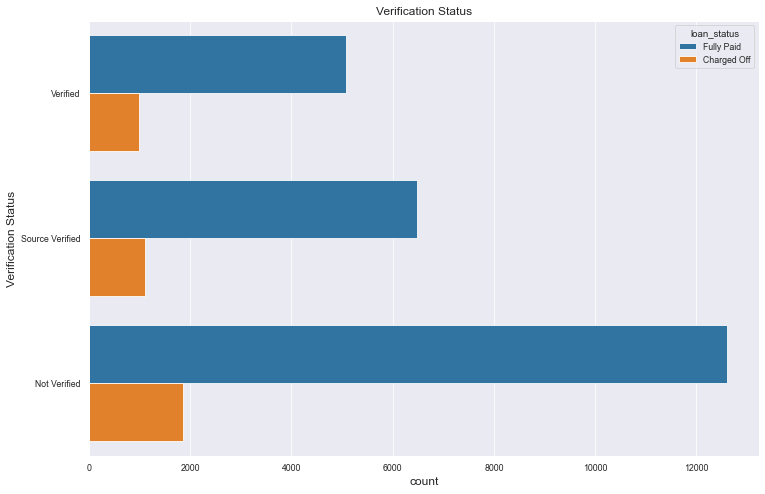

In [557]:
countPlotChargedOff('verification_status','loan_status','Verification Status','count','Verification Status')

Observation: Non-Verified loans have a higher changes of charged off

   addr_state  loan_status  Charged off %
53         NE  Charged Off      60.000000
62         NV  Charged Off      21.902017
26         ID  Charged Off      20.000000
78         SD  Charged Off      19.230769
23         HI  Charged Off      19.166667
19         FL  Charged Off      17.438055
60         NM  Charged Off      17.123288
46         MO  Charged Off      16.699029
9          CA  Charged Off      16.084484
21         GA  Charged Off      15.794872
70         OR  Charged Off      15.773810
1          AK  Charged Off      15.686275
58         NJ  Charged Off      15.310234
13         CT  Charged Off      14.615385
80         TN  Charged Off      14.285714
39         MD  Charged Off      14.182344
56         NH  Charged Off      14.049587
52         NC  Charged Off      13.996317
7          AZ  Charged Off      13.836478
68         OK  Charged Off      13.809524
42         MI  Charged Off      13.549618
44         MN  Charged Off      13.402062
33         KY  Charged Off      13

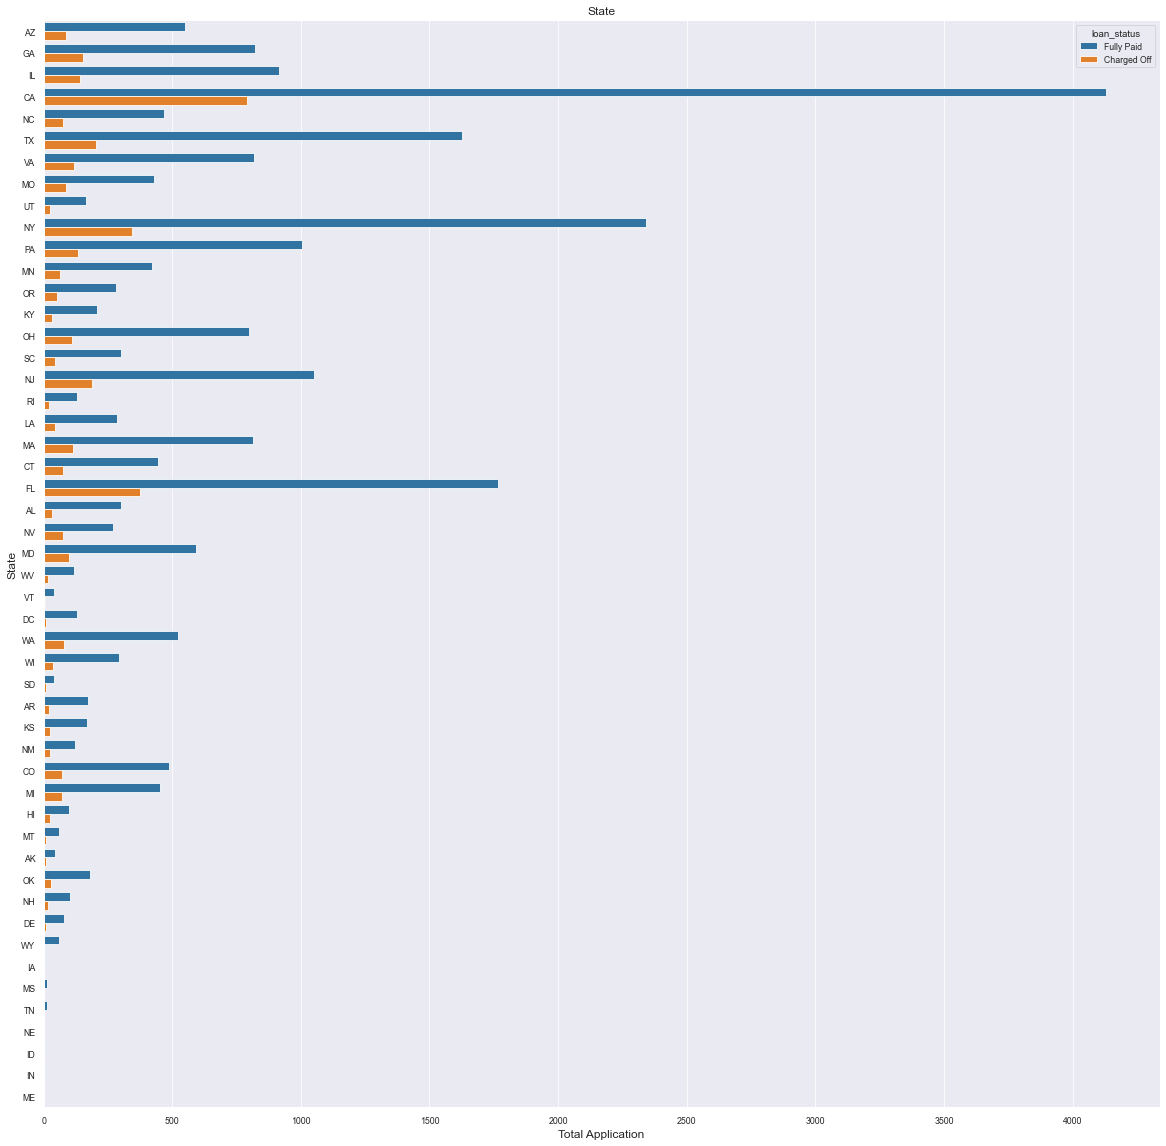

In [558]:
count_plot_charged_off('addr_state','loan_status','State','Total Application','State',20,20)


States like CA / FL / NY have higher probablity of charged off

   grade  loan_status  Charged off %
13     G  Charged Off      46.590909
11     F  Charged Off      29.500000
9      E  Charged Off      26.638177
7      D  Charged Off      21.958881
5      C  Charged Off      17.662428
3      B  Charged Off      12.717770
1      A  Charged Off       6.521479


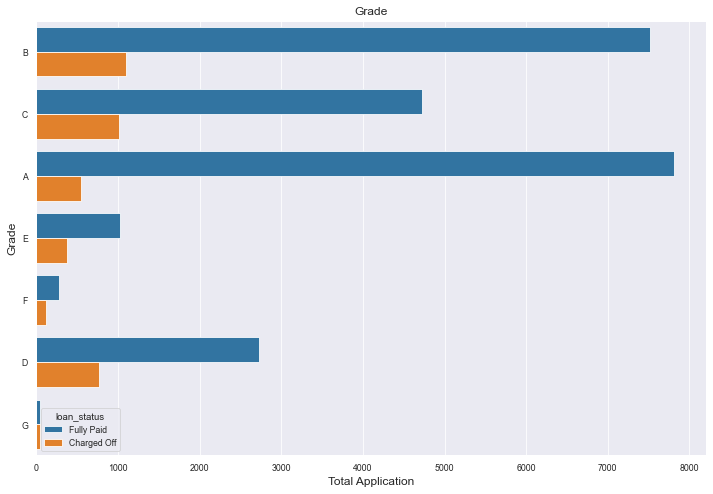

In [559]:
# count_plot_charged_off('verification_status','loan_status','Verification Status','Verification Status','count')
count_plot_charged_off('grade','loan_status','Grade','Total Application','Grade')


Observation: Grade level B/C/D have higher chances of charged off

### Segmented Univariate Analysis

#  Analysing by Creating bins and comparing them with each other
installment, loan_df amount , Annual Incom , dti ratio

In [560]:
loan_df['loan_amnt_bin'] = pd.qcut(loan_df['loan_amnt'], q=5, precision=0)
loan_df['dti_bin'] = pd.qcut(loan_df['dti'], q=5, precision=0)
loan_df['annual_inc_bin'] = pd.qcut(loan_df['annual_inc'], q=5, precision=0)
loan_df['installment_bin'] = pd.qcut(loan_df['installment'], q=5, precision=0)
loan_df['int_rate_bin'] = pd.qcut(loan_df['int_rate'], q=5, precision=0)

In [561]:
# Analysis of debt to installmant ratio

        dti_bin  loan_status  Charged off %
9  (20.0, 30.0]  Charged Off      15.939448
7  (15.0, 20.0]  Charged Off      14.939459
5  (11.0, 15.0]  Charged Off      14.212116
3   (7.0, 11.0]  Charged Off      12.845181
1   (-1.0, 7.0]  Charged Off      12.453366


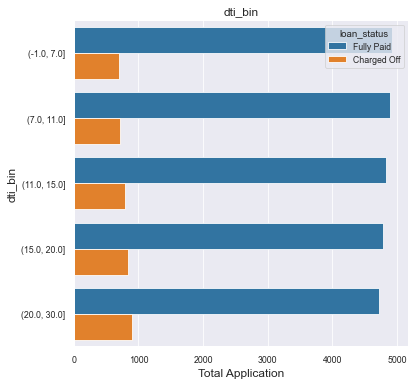

In [562]:
count_plot_charged_off('dti_bin','loan_status','dti_bin','Total Application','dti_bin',6,6)

Observastion: Higher the DTI value higer charge off is possible for the borrower

In [563]:
# Analysis based on INT_RATE for created bins

   int_rate_bin  loan_status  Charged off %
9  (14.0, 24.0]  Charged Off      25.444685
7  (12.0, 14.0]  Charged Off      17.415138
5  (10.0, 12.0]  Charged Off      15.414878
3   (7.0, 10.0]  Charged Off      10.956575
1    (4.0, 7.0]  Charged Off       5.773258


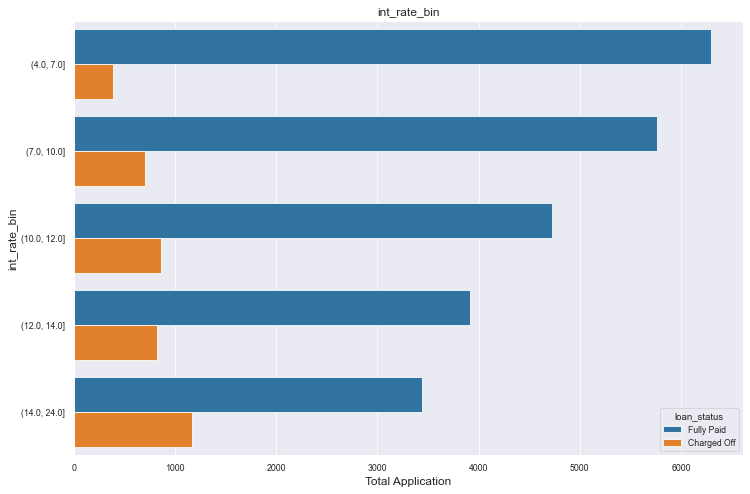

In [564]:
count_plot_charged_off('int_rate_bin','loan_status','int_rate_bin','Total Application','int_rate_bin')


Observation: Higher the interest rate more likely the borrower could go status as charged off

        annual_inc_bin  loan_status  Charged off %
1    (3999.0, 33600.0]  Charged Off      17.947350
3   (33600.0, 45000.0]  Charged Off      16.023883
5   (45000.0, 56000.0]  Charged Off      13.312512
7   (56000.0, 72000.0]  Charged Off      12.626696
9  (72000.0, 104860.0]  Charged Off      10.058063


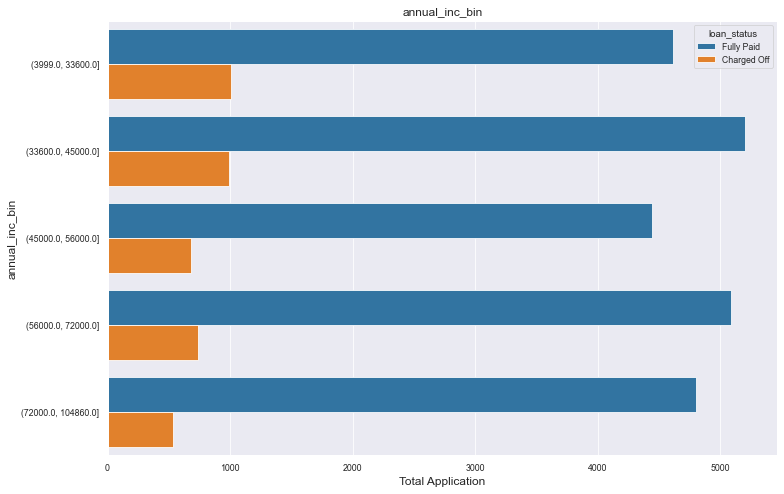

In [565]:
# Analysis based on Annual Income
count_plot_charged_off('annual_inc_bin','loan_status','annual_inc_bin','Total Application','annual_inc_bin')

Loans issued to with income below 45K are morelikely to default 

## Bivariate Analysis

**Analysis of Loan amount vs Interest rate

<AxesSubplot:xlabel='loan_amnt', ylabel='int_rate'>

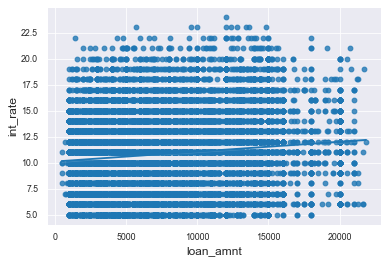

In [566]:
sns.regplot(x=loan_df.loan_amnt, y=loan_df.int_rate)


In [481]:
def box_plot_bv_analysis( x_axis,y_axis, title, y_label, x_label, size_x= 12,size_y=8):
    plot = sns.boxplot( x = x_axis,y = y_axis, data =loan_df)
    plot.set_title(title)
    plot.set_ylabel(y_label)
    plot.set_xlabel(x_label)
    plt.figure(figsize = (size_x,size_y))
    plt.show()

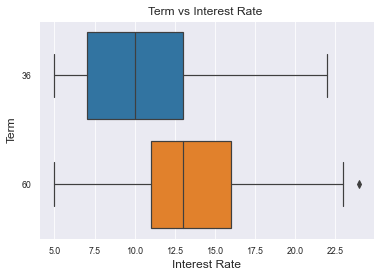

<Figure size 864x576 with 0 Axes>

In [567]:
box_plot_bv_analysis('int_rate', 'term', 'Term vs Interest Rate ', 'Term','Interest Rate')

Observation: Interest rate is higher for 60 Month loan term

### Loan Amount Vs Grade

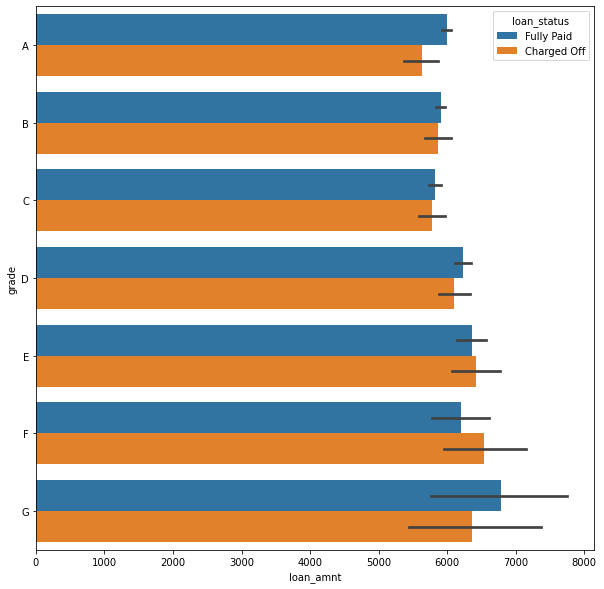

In [106]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.show()

Observation: E/F/G Graded Applicants are riskier one and higher risk of charge off

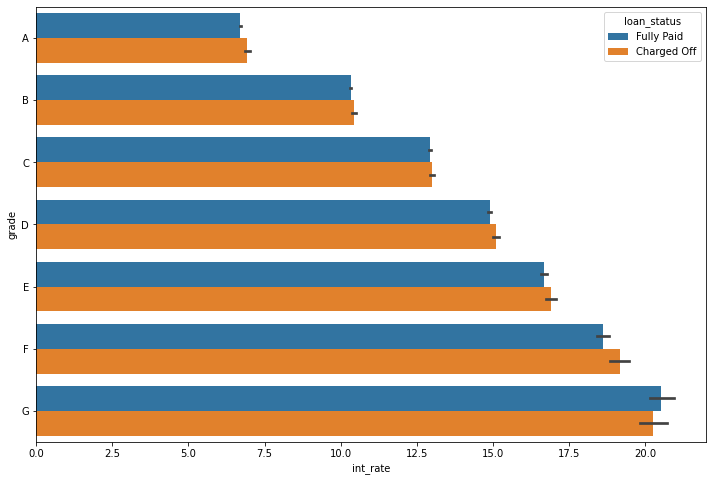

In [107]:
plt.figure(figsize=(12,8))
sns.barplot(data =loan_df,x='int_rate', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.show()

Observation : if higher rate of interest is charged to grade E/F/G higher the rist of Charged off

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_bin,dti_bin,annual_inc_bin,installment_bin,int_rate_bin
2,2400,2400.0,36,15,84.33,C,C5,10,RENT,12252.0,...,98,10,0.0,Dec,2011,"(499.0, 4000.0]","(7.0, 11.0]","(3999.0, 33600.0]","(15.0, 125.0]","(14.0, 24.0]"
6,7000,7000.0,60,15,170.08,C,C5,8,RENT,47004.0,...,85,11,0.0,Dec,2011,"(6000.0, 9000.0]","(20.0, 30.0]","(45000.0, 56000.0]","(125.0, 190.0]","(14.0, 24.0]"
10,6500,6500.0,60,14,153.45,C,C3,5,OWN,72000.0,...,20,23,0.0,Dec,2011,"(6000.0, 9000.0]","(15.0, 20.0]","(56000.0, 72000.0]","(125.0, 190.0]","(12.0, 14.0]"
15,1000,1000.0,36,16,35.31,D,D1,1,RENT,28000.0,...,81,23,0.0,Dec,2011,"(499.0, 4000.0]","(20.0, 30.0]","(3999.0, 33600.0]","(15.0, 125.0]","(14.0, 24.0]"
16,10000,10000.0,36,15,347.98,C,C4,4,RENT,42000.0,...,70,28,0.0,Dec,2011,"(9000.0, 12000.0]","(15.0, 20.0]","(33600.0, 45000.0]","(345.0, 751.0]","(14.0, 24.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39710,5000,250.0,36,7,155.38,A,A2,1,OWN,85000.0,...,0,19,0.0,Jul,2007,"(4000.0, 6000.0]","(-1.0, 7.0]","(72000.0, 104860.0]","(125.0, 190.0]","(4.0, 7.0]"
39711,5000,700.0,36,8,158.30,B,B1,5,MORTGAGE,75000.0,...,23,29,0.0,Jul,2007,"(4000.0, 6000.0]","(15.0, 20.0]","(72000.0, 104860.0]","(125.0, 190.0]","(7.0, 10.0]"
39713,8500,875.0,36,10,275.38,C,C1,3,RENT,18000.0,...,26,9,0.0,Jul,2007,"(6000.0, 9000.0]","(-1.0, 7.0]","(3999.0, 33600.0]","(262.0, 345.0]","(7.0, 10.0]"
39714,5000,1325.0,36,8,156.84,A,A4,1,MORTGAGE,100000.0,...,19,20,0.0,Jul,2007,"(4000.0, 6000.0]","(-1.0, 7.0]","(72000.0, 104860.0]","(125.0, 190.0]","(7.0, 10.0]"


### Conclusion

* Hight the rate of interest and Longer Team Increase are likely to be charged off.
* Loan Issued in month of December/November/October are more likely to get charged Off.
* Organisation should avoid giving loans to unverified borrowers
* Applicants with E/F/G Grade if given loan with higer rate of interest are likely tobe charged off
* Hight Interest Rate and Longer Team Increase the Probability of charged off.